In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [2]:
class Jackknife:
    def __init__( self, len_data, binsize ):
        self.binsize = binsize
        self.nbins = int(len_data/self.binsize)
        self.N = self.binsize * self.nbins
        self.jack_avg = []
        self.est = 0
        self.var_est = 0

    def set( self, func, list_of_data ):
        for i in range( self.nbins ):
            self.jack_avg.append( func( i, self.binsize, list_of_data ) )

    def do_it( self ):
        for i in range( 0, self.nbins ):
            self.est += self.jack_avg[i]
        self.est /= self.nbins

        for i in range( 0, self.nbins ):
            self.var_est += ( self.jack_avg[i] - self.est )**2
        self.var_est /= self.nbins
        self.var_est *= self.nbins -1

    def mean( self ):
        return self.est

    def var( self ):
        return self.var_est

    def err( self ):
        return np.sqrt(self.var_est)

def simple_mean(i, binsize, np_data):
    resmpld = np.delete(np_data, np.s_[i*binsize:(i+1)*binsize], axis=0)
    return np.mean(resmpld, axis=0)

def format_print(cen, err):
    for i in range(-50, 50):
        if 10**(-i+1)>=err>10**(-i):
            tmp=err*10**(i+1)
            return '{num:.{width}f}'.format(num=cen, width=i+1)+'('+str(round(tmp))+')'

def format_print_w_exact(exact, cen, err):
    if np.abs(err)<1.0e-15:
        return str(cen)+" exact:"+str(exact)
    for i in range(-50, 50):
        if 10**(-i+1)>=err>10**(-i):
            tmp=err*10**(i+1)
            return '{num:.{width}f}'.format(num=cen, width=i+1)+'('+str(round(tmp))+')'+' exact:'+'{ex:.{width}f}'.format(ex=exact, width=i+2)+' ['+'{num:.{width}f}'.format(num=abs(exact-cen)/err, width=2)+' sigma]'

In [3]:
def format_print_w_exact_matrix(exact, cen, err):
    shape=exact.shape
    res=np.full(shape, "", dtype=object)

    for i in np.arange(shape[0]):
        for j in np.arange(shape[1]):
            res[i,j]=format_print_w_exact(exact[i,j], cen[i,j], err[i,j])
            
    return np.array(res)

In [4]:
beta=0.274653
h=0.

# kx=1.2
# ky=1.5
# kz=0.3

kx=1.0
ky=1.0
kz=1.0

In [5]:
# nin=60*100
# nfin=180000
# nint=60
# binsize=1

In [6]:
dir_comp = "/Users/nobuyukimatsumoto/github/QuantumGeometry/sandbox/nm/obs/"
dir_comp_wolff = "/Users/nobuyukimatsumoto/github/QuantumGeometry/sandbox/nm/obs_wolff_only/"

In [7]:
# mag_=[]

# for n in range(nin,nfin,nint):
#     dat=np.loadtxt(dir_comp+"mag/"+str(n)+".dat")
#     mag_.append(dat)
    
# mag=np.array(mag_)

In [8]:
# jk_mag = Jackknife(mag.size, binsize)
# jk_mag.set(simple_mean, mag)
# jk_mag.do_it()

In [9]:
# print("mag_per_site")
# format_print_w_exact(0.0, jk_mag.mean(), jk_mag.err())

In [10]:
# jk_mag.mean()

In [11]:
# delta=1.0e-3
# h=1.0

# print("mag")
# numeric=(np.log(Z3x3_numeric(beta, h+delta, kx,ky,kz))-np.log(Z3x3_numeric(beta, h-delta, kx,ky,kz)))/(2.0*delta)/9.0
# exact=mag_per_site3x3_numeric(beta,h, kx,ky,kz)
# print(format_print_w_exact(exact, numeric, delta**2))

In [12]:
h=0.0

In [13]:
# np.mean(mag**2/32)

In [14]:
# jk_magsq = Jackknife(mag.size, binsize)
# jk_magsq.set(simple_mean, mag**2/32)
# jk_magsq.do_it()

In [15]:
# print("susc")
# numeric=(mag_per_site3x3_numeric(beta,h+delta, kx,ky,kz)-mag_per_site3x3_numeric(beta,h-delta, kx,ky,kz))/(2.0*delta)
# format_print(numeric, jk_magsq.mean(), jk_magsq.err())

In [16]:
# print("susc")
# format_print(jk_magsq.mean(), jk_magsq.err())

In [17]:
# jk_magsq.mean()

In [18]:
# delta=1.0e-3
# print("mag")
# numeric=-(np.log(Z2x2(beta, h+delta, kx,ky,kz))-np.log(Z2x2(beta, h-delta, kx,ky,kz)))/(2.0*delta)/4.0
# exact=mag_per_site2x2(beta,h, kx,ky,kz)
# print(format_print_w_exact(exact, numeric, delta**2))
# print("susc")
# numeric=-(mag_per_site2x2(beta,h+delta, kx,ky,kz)-mag_per_site2x2(beta,h-delta, kx,ky,kz))/(2.0*delta)
# exact=susc2x2(beta,h, kx,ky,kz)
# print(format_print_w_exact(exact, numeric, delta**2))

In [19]:
lx=64
lx_half=int(lx/2)

nint=60
nin=nint*100
nfin=nin+1600*nint

In [20]:
ss_=[]

for n in range(nin,nfin,nint):
    dat=np.loadtxt(dir_comp_wolff+"ss/"+str(n)+".dat")
    ss_.append(dat)
    
ss=np.array(ss_)

In [21]:
ss.shape

(1600, 64, 64)

In [22]:
# binsize=400
# corr_xs = [np.mean(ss[i*binsize:(i+1)*binsize], axis=0)[0] for i in range(10)]
binsize=200
corr_xs = [np.mean(ss[i*binsize:(i+1)*binsize], axis=0)[0] for i in range(20)]

/opt/anaconda3/lib/python3.9/site-packages/numpy/core/fromnumeric.py:3464: RuntimeWarning: Mean of empty slice.
  return _methods._mean(a, axis=axis, dtype=dtype,
/opt/anaconda3/lib/python3.9/site-packages/numpy/core/_methods.py:184: RuntimeWarning: invalid value encountered in divide
  ret = um.true_divide(


In [23]:
jk_ss = Jackknife(ss.size, binsize)
jk_ss.set(simple_mean, ss)
jk_ss.do_it()

In [24]:
ss.shape

(1600, 64, 64)

In [25]:
nfin/binsize

510.0

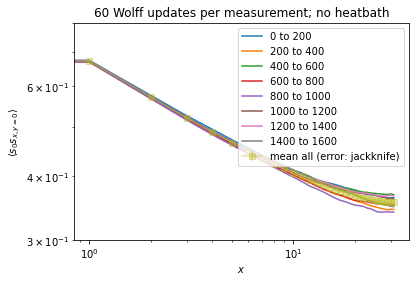

In [26]:
plt.plot(corr_xs[0][:lx_half], alpha=1.0, label="0 to 200")
plt.plot(corr_xs[1][:lx_half], alpha=1.0, label="200 to 400")
plt.plot(corr_xs[2][:lx_half], alpha=1.0, label="400 to 600")
plt.plot(corr_xs[3][:lx_half], alpha=1.0, label="600 to 800")
plt.plot(corr_xs[4][:lx_half], alpha=1.0, label="800 to 1000")
plt.plot(corr_xs[5][:lx_half], alpha=1.0, label="1000 to 1200")
plt.plot(corr_xs[6][:lx_half], alpha=1.0, label="1200 to 1400")
plt.plot(corr_xs[7][:lx_half], alpha=1.0, label="1400 to 1600")

plt.errorbar(np.arange(lx_half), 
             jk_ss.mean()[0][:lx_half], 
             jk_ss.err()[0][:lx_half],
             label="mean all (error: jackknife)",
             marker="s",
             alpha=0.4)

plt.title("60 Wolff updates per measurement; no heatbath")

plt.legend()

plt.ylim(0.3, 0.8)
plt.xscale("log")
plt.yscale("log")
plt.legend()

plt.xlabel("$x$")
plt.ylabel("$\\langle s_0 s_{x,y=0} \\rangle$")

plt.savefig("autocorrelation_newcode_wolffonly.png", bbox_inches="tight")

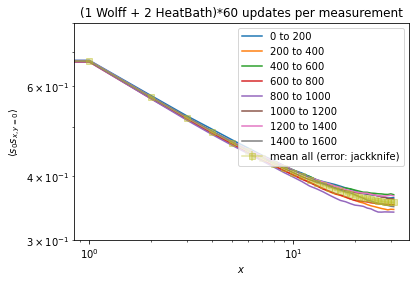

In [27]:
plt.plot(corr_xs[0][:lx_half], alpha=1.0, label="0 to 200")
plt.plot(corr_xs[1][:lx_half], alpha=1.0, label="200 to 400")
plt.plot(corr_xs[2][:lx_half], alpha=1.0, label="400 to 600")
plt.plot(corr_xs[3][:lx_half], alpha=1.0, label="600 to 800")
plt.plot(corr_xs[4][:lx_half], alpha=1.0, label="800 to 1000")
plt.plot(corr_xs[5][:lx_half], alpha=1.0, label="1000 to 1200")
plt.plot(corr_xs[6][:lx_half], alpha=1.0, label="1200 to 1400")
plt.plot(corr_xs[7][:lx_half], alpha=1.0, label="1400 to 1600")

plt.errorbar(np.arange(lx_half), 
             jk_ss.mean()[0][:lx_half], 
             jk_ss.err()[0][:lx_half],
             label="mean all (error: jackknife)",
             marker="s",
             alpha=0.4)

plt.title("(1 Wolff + 2 HeatBath)*60 updates per measurement")

plt.legend()

plt.ylim(0.3, 0.8)
plt.xscale("log")
plt.yscale("log")
plt.legend()

plt.xlabel("$x$")
plt.ylabel("$\\langle s_0 s_{x,y=0} \\rangle$")

plt.savefig("autocorrelation_newcode_wolffandheatbath.png", bbox_inches="tight")

In [28]:
evan_x_direct="/Users/nobuyukimatsumoto/github/newQFE/nm/ising_flat_crit/64_1.000_1.000_1.000_corr_x_direct.dat"
evan_x_improved="/Users/nobuyukimatsumoto/github/newQFE/nm/ising_flat_crit/64_1.000_1.000_1.000_corr_x.dat"

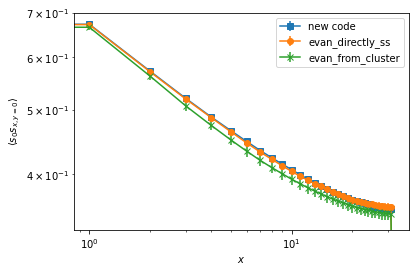

In [47]:
dat_x_direct=np.loadtxt(evan_x_direct)
dat_x_improved=np.loadtxt(evan_x_improved)

plt.errorbar(np.arange(lx_half), 
             jk_ss.mean()[0][:lx_half], 
             jk_ss.err()[0][:lx_half],
            label="new code",
             marker="s",
            alpha=1.0)

plt.errorbar(dat_x_direct.T[1], 
             dat_x_direct.T[2], 
             dat_x_direct.T[3],
            label="evan_directly_ss",
             marker="o",
            alpha=1.0)

plt.errorbar(dat_x_improved.T[1], 
             dat_x_improved.T[2], 
             dat_x_improved.T[3],
            label="evan_from_cluster",
             marker="x",
            alpha=1.0)

plt.ylim(0.33, 0.7)
plt.xscale("log")
plt.yscale("log")
plt.legend()

plt.xlabel("$x$")
plt.ylabel("$\\langle s_0 s_{x,y=0} \\rangle$")

plt.savefig("comparison.png", bbox_inches="tight")

In [30]:
evan_y_direct="/Users/nobuyukimatsumoto/github/newQFE/nm/ising_flat_crit/64_1.000_1.000_1.000_corr_y_direct.dat"
evan_y_improved="/Users/nobuyukimatsumoto/github/newQFE/nm/ising_flat_crit/64_1.000_1.000_1.000_corr_y.dat"
evan_w_direct="/Users/nobuyukimatsumoto/github/newQFE/nm/ising_flat_crit/64_1.000_1.000_1.000_corr_w_direct.dat"
evan_w_improved="/Users/nobuyukimatsumoto/github/newQFE/nm/ising_flat_crit/64_1.000_1.000_1.000_corr_w.dat"
evan_z_direct="/Users/nobuyukimatsumoto/github/newQFE/nm/ising_flat_crit/64_1.000_1.000_1.000_corr_z_direct.dat"
evan_z_improved="/Users/nobuyukimatsumoto/github/newQFE/nm/ising_flat_crit/64_1.000_1.000_1.000_corr_z.dat"

In [31]:
dat_y_direct=np.loadtxt(evan_y_direct)
dat_w_direct=np.loadtxt(evan_w_direct)
dat_z_direct=np.loadtxt(evan_z_direct)

In [32]:
dat_y_improved=np.loadtxt(evan_y_improved)
dat_w_improved=np.loadtxt(evan_w_improved)
dat_z_improved=np.loadtxt(evan_z_improved)

In [33]:
evan_all_direct="/Users/nobuyukimatsumoto/github/newQFE/nm/ising_flat_crit/64_1.000_1.000_1.000_corr_all_direct.dat"

In [34]:
dat_all_direct=np.loadtxt(evan_all_direct)

In [35]:
ss_mean_evan = dat_all_direct.T[4].reshape(lx,lx)
ss_err_evan = dat_all_direct.T[5].reshape(lx,lx)

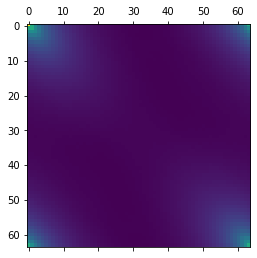

In [36]:
plt.matshow(np.log10(jk_ss.mean()))

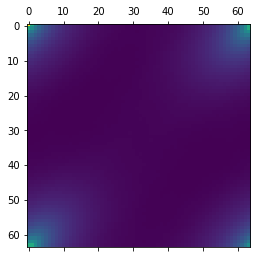

In [37]:
plt.matshow(np.log10(ss_mean_evan))

In [38]:
ss_ww_mean_evan = [ss_mean_evan[(i+lx)%lx][(-i+lx)%lx] for i in range(lx)]
ss_ww_err_evan = [ss_err_evan[(i+lx)%lx][(-i+lx)%lx] for i in range(lx)]

ss_zz_mean_evan = [ss_mean_evan[(i+lx)%lx][(i+lx)%lx] for i in range(lx)]
ss_zz_err_evan = [ss_err_evan[(i+lx)%lx][(i+lx)%lx] for i in range(lx)]

<ErrorbarContainer object of 3 artists>

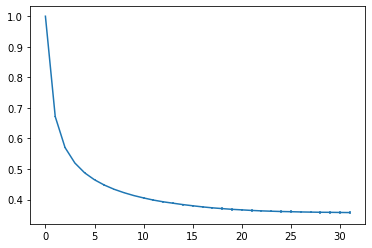

In [39]:
plt.errorbar(
    np.arange(lx_half),
    ss_ww_mean_evan[:lx_half],
    ss_ww_err_evan[:lx_half],
    label="ss_ww_evan from all"
)

In [40]:
dat_w_direct.T[1][:lx:]

array([ 0.,  1.,  2.,  3.,  4.,  5.,  6.,  7.,  8.,  9., 10., 11., 12.,
       13., 14., 15., 16., 17., 18., 19., 20., 21., 22., 23., 24., 25.,
       26., 27., 28., 29., 30., 31., 32., 33., 34., 35., 36., 37., 38.,
       39., 40., 41., 42., 43., 44., 45., 46., 47., 48., 49., 50., 51.,
       52., 53., 54., 55., 56., 57., 58., 59., 60., 61., 62., 63.])

In [41]:
# plt.errorbar(dat_z_direct.T[1][:lx:], 
#              dat_z_direct.T[2][:lx:], 
#              dat_z_direct.T[3][:lx:],
#              label="evan_w_direct",
#              marker="o",
#              alpha=1.0)

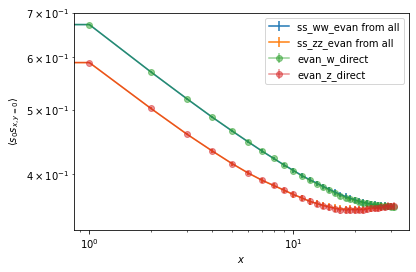

In [48]:
plt.errorbar(
    np.arange(lx_half),
    ss_ww_mean_evan[:lx_half],
    ss_ww_err_evan[:lx_half],
    label="ss_ww_evan from all"
)

plt.errorbar(
    np.arange(lx_half),
    ss_zz_mean_evan[:lx_half],
    ss_zz_err_evan[:lx_half],
    label="ss_zz_evan from all"
)

plt.errorbar(np.arange(lx_half), 
             dat_w_direct.T[2][:lx:2], 
             dat_w_direct.T[3][:lx:2],
             label="evan_w_direct",
             marker="o",
             alpha=0.5)

plt.errorbar(np.arange(lx_half), 
             dat_z_direct.T[2][:lx:2], 
             dat_z_direct.T[3][:lx:2],
             label="evan_z_direct",
             marker="o",
             alpha=0.5)

# plt.errorbar(np.arange(lx_half), 
#              jk_ss.mean()[0][:lx_half], 
#              jk_ss.err()[0][:lx_half],
#              label="new code_x",
#              ls="dashed",
#              marker="s",
#              alpha=0.2)

# plt.errorbar(np.arange(lx_half),
#              jk_ss.mean().diagonal()[:lx_half],
#              jk_ss.err().diagonal()[:lx_half],
#              label="new code_diag",
#              ls="dashed",
#              marker="s",
#              alpha=0.2)

plt.ylim(0.33, 0.7)
plt.xscale("log")
plt.yscale("log")
plt.legend()

plt.xlabel("$x$")
plt.ylabel("$\\langle s_0 s_{x,y=0} \\rangle$")

plt.savefig("comparison_debugging.png", bbox_inches="tight")

In [43]:
jk_ss.mean().diagonal()

array([1.        , 0.67245361, 0.57168762, 0.52110779, 0.48916199,
       0.46632263, 0.44878174, 0.4352417 , 0.42448242, 0.41526611,
       0.40745728, 0.40090454, 0.39543579, 0.39064209, 0.38694885,
       0.38343567, 0.3800769 , 0.37703613, 0.37444092, 0.37222168,
       0.37058472, 0.36880737, 0.3670697 , 0.36547852, 0.36424438,
       0.36301331, 0.36208252, 0.36109436, 0.36040405, 0.36002441,
       0.35945374, 0.35949768, 0.35961243, 0.35949768, 0.35945374,
       0.36002441, 0.36040405, 0.36109436, 0.36208252, 0.36301331,
       0.36424438, 0.36547852, 0.3670697 , 0.36880737, 0.37058472,
       0.37222168, 0.37444092, 0.37703613, 0.3800769 , 0.38343567,
       0.38694885, 0.39064209, 0.39543579, 0.40090454, 0.40745728,
       0.41526611, 0.42448242, 0.4352417 , 0.44878174, 0.46632263,
       0.48916199, 0.52110779, 0.57168762, 0.67245361])

<ErrorbarContainer object of 3 artists>

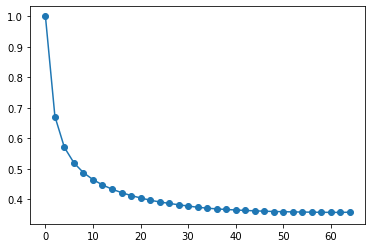

In [44]:
plt.errorbar(dat_w_direct.T[1][::2], 
             dat_w_direct.T[2][::2], 
             dat_w_direct.T[3][::2],
            label="evan_w_direct",
             marker="o",
            alpha=1.0)

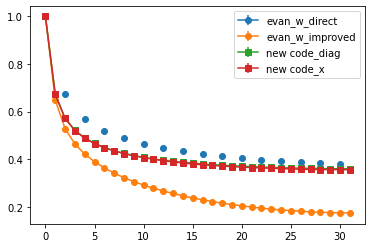

In [45]:
plt.errorbar(np.arange(lx_half), 
             dat_w_direct.T[2][:lx_half:], 
             dat_w_direct.T[3][:lx_half:],
            label="evan_w_direct",
             marker="o",
            alpha=1.0)

plt.errorbar(np.arange(lx_half), 
             dat_w_improved.T[2][:lx_half:], 
             dat_w_improved.T[3][:lx_half:],
            label="evan_w_improved",
             marker="o",
            alpha=1.0)

plt.errorbar(np.arange(lx_half), 
             jk_ss.mean().diagonal()[:lx_half], 
             jk_ss.err().diagonal()[:lx_half],
            label="new code_diag",
             marker="s",
            alpha=1.0)

plt.errorbar(np.arange(lx_half), 
             jk_ss.mean()[0][:lx_half], 
             jk_ss.err()[0][:lx_half],
            label="new code_x",
             marker="s",
            alpha=1.0)

plt.legend()

plt.savefig("debug_ww.png", bbox_inches="tight")

In [46]:
jk_ss.mean().diagonal()[:lx_half]/dat_w_direct.T[2][::2]

ValueError: operands could not be broadcast together with shapes (32,) (33,) 

In [ ]:
plt.errorbar(dat_w_improved.T[1][::2], 
             dat_w_improved.T[2][::2], 
             dat_w_improved.T[3][::2],
            label="evan_w_improved",
             marker="o",
            alpha=1.0)

In [ ]:
# plt.errorbar(dat_x_direct.T[1], 
#              dat_x_direct.T[2], 
#              dat_x_direct.T[3],
#             label="evan_x_direct",
#              marker="o",
#             alpha=1.0)

# plt.errorbar(dat_y_direct.T[1], 
#              dat_y_direct.T[2], 
#              dat_y_direct.T[3],
#             label="evan_y_direct",
#              marker="o",
#             alpha=1.0)

plt.errorbar(dat_w_direct.T[1][::2], 
             dat_w_direct.T[2][::2], 
             dat_w_direct.T[3][::2],
            label="evan_w_direct",
             marker="o",
            alpha=1.0)

# plt.errorbar(dat_w_direct.T[1][::2], 
#              dat_w_direct.T[2][::2], 
#              dat_w_direct.T[3][::2],
#             label="evan_w_direct",
#              marker="o",
#             alpha=1.0)

# plt.errorbar(dat_w_improved.T[1][::2], 
#              dat_w_improved.T[2][::2], 
#              dat_w_improved.T[3][::2],
#             label="evan_w_improved",
#              marker="o",
#             alpha=1.0)

plt.errorbar(np.arange(lx_half), 
             jk_ss.mean()[0][:lx_half], 
             jk_ss.err()[0][:lx_half],
            label="new code_x",
             marker="s",
            alpha=1.0)

# plt.errorbar(np.arange(lx_half), 
#              jk_ss.mean().T[0][:lx_half], 
#              jk_ss.err().T[0][:lx_half],
#             label="new code_y",
#              marker="s",
#             alpha=1.0)

plt.ylim(0.33, 0.7)
plt.xscale("log")
plt.yscale("log")
plt.legend()

plt.xlabel("$x$")
plt.ylabel("$\\langle s_0 s_{x,y=0} \\rangle$")

In [ ]:
dat_x_direct=np.loadtxt(evan_x_direct)
dat_x_improved=np.loadtxt(evan_x_improved)

plt.errorbar(np.arange(lx_half), 
             jk_ss.mean().T[0][:lx_half], 
             jk_ss.err().T[0][:lx_half],
            label="new code",
             marker="s",
            alpha=1.0)

plt.errorbar(dat_w_direct.T[1], 
             dat_w_direct.T[2], 
             dat_w_direct.T[3],
            label="evan_directly_ss",
             marker="o",
            alpha=1.0)

plt.errorbar(dat_w_improved.T[1], 
             dat_w_improved.T[2], 
             dat_w_improved.T[3],
            label="evan_from_cluster",
             marker="x",
            alpha=1.0)

plt.ylim(0.33, 0.7)
plt.xscale("log")
plt.yscale("log")
plt.legend()

plt.xlabel("$x$")
plt.ylabel("$\\langle s_0 s_{x,y=0} \\rangle$")

# plt.savefig("comparison.png", bbox_inches="tight")

In [ ]:
exex_=[]

for n in range(nin,nfin,nint):
    dat=np.loadtxt("./obs/exex/"+str(n)+".dat")
    exex_.append(dat)
    
exex=np.array(exex_)

jk_exex = Jackknife(exex.size, binsize)
jk_exex.set(simple_mean, exex)
jk_exex.do_it()

print(format_print_w_exact_matrix(exex_corr_numeric(beta, h, kx,ky,kz), jk_exex.mean(), jk_exex.err()))

In [ ]:
jk_exex.mean()

In [ ]:
exey_=[]

for n in range(nin,nfin,nint):
    dat=np.loadtxt("./obs/exey/"+str(n)+".dat")
    exey_.append(dat)
    
exey=np.array(exey_)

jk_exey = Jackknife(exey.size, binsize)
jk_exey.set(simple_mean, exey)
jk_exey.do_it()

print(format_print_w_exact_matrix(exey_corr_numeric(beta, h, kx,ky,kz), jk_exey.mean(), jk_exey.err()))

In [ ]:
exez_=[]

for n in range(nin,nfin,nint):
    dat=np.loadtxt("./obs/exez/"+str(n)+".dat")
    exez_.append(dat)
    
exez=np.array(exez_)

jk_exez = Jackknife(exez.size, binsize)
jk_exez.set(simple_mean, exez)
jk_exez.do_it()

print(format_print_w_exact_matrix(exez_corr_numeric(beta, h, kx,ky,kz), jk_exez.mean(), jk_exez.err()))

In [ ]:
eyey_=[]

for n in range(nin,nfin,nint):
    dat=np.loadtxt("./obs/eyey/"+str(n)+".dat")
    eyey_.append(dat)
    
eyey=np.array(eyey_)

jk_eyey = Jackknife(eyey.size, binsize)
jk_eyey.set(simple_mean, eyey)
jk_eyey.do_it()

print(format_print_w_exact_matrix(eyey_corr_numeric(beta, h, kx,ky,kz), jk_eyey.mean(), jk_eyey.err()))

In [ ]:
eyez_=[]

for n in range(nin,nfin,nint):
    dat=np.loadtxt("./obs/eyez/"+str(n)+".dat")
    eyez_.append(dat)
    
eyez=np.array(eyez_)

jk_eyez = Jackknife(eyez.size, binsize)
jk_eyez.set(simple_mean, eyez)
jk_eyez.do_it()

print(format_print_w_exact_matrix(eyez_corr_numeric(beta, h, kx,ky,kz), jk_eyez.mean(), jk_eyez.err()))

In [ ]:
ezez_=[]

for n in range(nin,nfin,nint):
    dat=np.loadtxt("./obs/ezez/"+str(n)+".dat")
    ezez_.append(dat)
    
ezez=np.array(ezez_)

jk_ezez = Jackknife(ezez.size, binsize)
jk_ezez.set(simple_mean, ezez)
jk_ezez.do_it()

print(format_print_w_exact_matrix(ezez_corr_numeric(beta, h, kx,ky,kz), jk_ezez.mean(), jk_ezez.err()))